In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import cv2
import os

from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve,auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

np.random.seed(42)

### LOADING THE DATA 

In [37]:
X_features = pd.read_csv(r'C:\Users\Avishkar\OneDrive\Documents\hw dataset\x_train_all.csv')

In [38]:
Y_labels = pd.read_csv(r'C:\Users\Avishkar\OneDrive\Documents\hw dataset\y_train_all.csv')

### FEATURE SELECTION WITH THE HELP OF PCA

In [40]:
feature_selection = PCA(n_components=130)
df_pca = feature_selection.fit_transform(X_features)

In [41]:
Y_labels.shape

(9690, 1)

### NORMALIZATION

In [43]:
x_nor = df_pca / 255.0  ## TO NORMALIZING THE PIXEL VALUES 

In [44]:
x_nor.shape

(9690, 130)

In [45]:
X_features.shape

(9690, 2304)

In [46]:
from sklearn.model_selection import train_test_split  ## SPLITING THE DATASET

In [47]:
xtrain,xtest,ytrain,ytest = train_test_split(X_features,Y_labels,test_size=0.3,random_state=42)

In [48]:
ytrain.shape,xtrain.shape

((6783, 1), (6783, 2304))

### EVALUATE THE DATA WITH DIFFERENT CLASSIFIERS

In [50]:
classifier = SVC()  ## SUPPORT VECTOR MACHINE

In [51]:
clas =  classifier.fit(xtrain,ytrain)

In [52]:
Accuracy = clas.score(xtest,ytest)

In [53]:
Accuracy           ## TESTING DATASET

0.8582731338149295

In [54]:
clsf = SGDClassifier()  ## STOCHASTIC GRADIENT CLASSIFIER
clf = clsf.fit(xtest,ytest)

In [55]:
accuracy = clf.score(xtest,ytest)

In [56]:
accuracy

0.8390092879256966

In [59]:
xtrain.shape

(6783, 2304)

In [60]:
nav_bayes = MultinomialNB()         ## NAIVE BAYES CLASSIFER
naive = nav_bayes.fit(xtrain,ytrain)

In [61]:
ACCURACY = naive.score(xtest,ytest)

In [62]:
ACCURACY

0.3587891296869625

In [63]:
## PREDITIONS 

In [64]:
xtrain.shape[1]

2304

### IMAGE PREPROCESSING 

In [65]:
xx_train = xtrain.values.reshape((xtrain.shape[0], 48, 48))  ## ADJUST THE DATASET ARRANGE THE SHAPE 

(-0.5, 47.5, 47.5, -0.5)

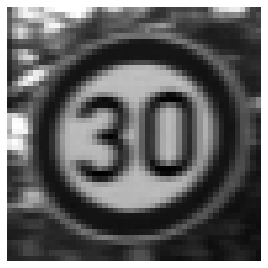

In [66]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(xx_train[5373],cmap='gray')
plt.axis('off')

### FOR MULTIPLE IMAGE 

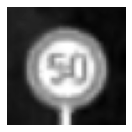

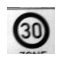

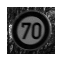

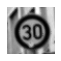

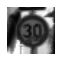

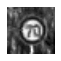

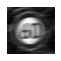

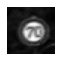

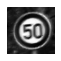

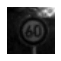

In [67]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(4,4,i+1),
    plt.imshow(xx_train[i],cmap='gray'),
    plt.axis('off'),
    plt.show()
    

### PREDICTIONS ON TEST

In [68]:
y_pred = nav_bayes.predict(xtest)

In [69]:
y_pred

array([4, 4, 3, ..., 4, 0, 6], dtype=int64)

#### generating the data set with 50,100,200 features.

#### creating the new dataset with labeling specific classes.

In [99]:
def generate_synthetic_dataset(labels_cls,pixel_num):  ## DEFINEE THE DATASET 
    
    pixel = np.random.rand(labels_cls,pixel_num)
    
    labels = np.random.randint(0, 10, size=labels_cls)
    
    for i in range(10):
        SPEC_CLAS = (labels== i)
        pixel[SPEC_CLAS,:i] += 1
        
    return pd.DataFrame(pixel,columns=[f'feature_{i}' for i in range(pixel_num)]),labels


### creating the new dataset with labeling specific classes.

In [101]:
labels_cls = 1000 ##NUMBER OF SAMPLE DATASET

In [ ]:
pixel_num_50 = 50    ## 50 features
new_dataset_50, new_labels_50 = generate_synthetic_dataset(labels_cls,pixel_num_50)

pixel_num_100 = 100  ## 100 features
new_dataset_100, new_labels_100 = generate_synthetic_dataset(labels_cls,pixel_num_100)

pixel_num_200 = 200  ## 200 features
new_dataset_200, new_labels_200 = generate_synthetic_dataset(labels_cls,pixel_num_200)


In [125]:
new_dataset_50,new_labels_50.shape

(     feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
 0     1.614241   1.757317   1.657361   1.804769   1.339074   1.763073   
 1     1.402341   1.799415   1.557533   1.282647   0.404504   0.939247   
 2     1.567185   1.377367   1.095662   1.128361   0.843385   0.896005   
 3     0.674153   0.657114   0.224298   0.639295   0.356081   0.076852   
 4     0.723527   0.778873   0.904859   0.851768   0.074237   0.176924   
 ..         ...        ...        ...        ...        ...        ...   
 995   1.623699   0.200070   0.699796   0.409950   0.016854   0.870073   
 996   1.180592   1.903771   0.978588   0.051737   0.484715   0.102995   
 997   1.554692   1.185187   1.403556   1.308041   1.852327   0.100256   
 998   1.762457   1.998196   0.325080   0.494216   0.402247   0.459249   
 999   1.788705   1.118037   1.152850   1.734636   1.441425   1.804818   
 
      feature_6  feature_7  feature_8  feature_9  ...  feature_40  feature_41  \
 0     1.301037   1.334488   

In [189]:
x1 = new_dataset_50
y2 = new_labels_50

In [190]:
X1TRAIN,X2TEST,Y1TRAIN,Y2TEST = train_test_split(x1,y2,test_size=0.3,random_state=42)

#### ACCURACY_FOR_50_FEATURES

In [202]:
nav_bayes = MultinomialNB()         ## NAIVE BAYES CLASSIFER
naive = nav_bayes.fit(X1TRAIN,Y1TRAIN)

In [203]:
ACCURACY_50 =  nav_bayes.score(X2TEST,Y2TEST)

In [204]:
ACCURACY_50

0.7366666666666667

#### ACCURACY_FOR_100_FEATURES

In [205]:
x3 = new_dataset_100
y3 = new_labels_100

In [206]:
X3TRAIN,X3TEST,Y3TRAIN,Y3TEST = train_test_split(x3,y3,test_size=0.2,random_state=42)

In [207]:
nav_bayes = MultinomialNB()         ## NAIVE BAYES CLASSIFER
naive = nav_bayes.fit(X3TRAIN,Y3TRAIN)

In [208]:
ACCURACY_100 =  nav_bayes.score(X3TEST,Y3TEST)

In [214]:
ACCURACY_100

0.74

#### ACCURACY_FOR_200_FEATURES

In [210]:
x4 = new_dataset_200
y4 = new_labels_200

In [211]:
X4TRAIN,X4TEST,Y4TRAIN,Y4TEST = train_test_split(x4,y4,test_size=0.4,random_state=42)

In [212]:
nav_bayes = MultinomialNB()         ## NAIVE BAYES CLASSIFER
naive = nav_bayes.fit(X4TRAIN,Y4TRAIN)

In [213]:
ACCURACY_200 =  nav_bayes.score(X4TEST,Y4TEST)

In [215]:
ACCURACY_200

0.655

### calculating the cross validation on each dataset

In [179]:
from sklearn.model_selection import cross_val_score

In [187]:
def cross_val(classifier,dataset,labels,folderss = 7):
    val_score = cross_val_score(classifier,dataset,labels,cv=folderss)
    print(f"Cross-validation scores: {val_score}")
    print(f"MEAN_ACCURACY: {val_score.mean():2f}")
    print(f"SD:{val_score.std():.2f}")

In [188]:
print("\nCross-validation for Dataset with 50 features:") 
cross_val(MultinomialNB(),new_dataset_50, new_labels_50)


Cross-validation for Dataset with 50 features:
Cross-validation scores: [0.78321678 0.74825175 0.74825175 0.81818182 0.74125874 0.8041958
 0.76760563]
MEAN_ACCURACY: 0.772995
SD:0.03


In [184]:
print("\nCross-validation for Dataset with 100 features:")
cross_val(MultinomialNB(),new_dataset_100, new_labels_100)


Cross-validation for Dataset with 100 features:
Cross-validation scores: [0.81818182 0.8041958  0.74125874 0.75524476 0.77622378 0.75524476
 0.8028169 ]
MEAN_ACCURACY: 0.779024
SD:0.03


In [185]:
print("\nCross-validation for Dataset with 200 features:")
cross_val(MultinomialNB(),new_dataset_200, new_labels_200)


Cross-validation for Dataset with 200 features:
Cross-validation scores: [0.79020979 0.72027972 0.72027972 0.72027972 0.70629371 0.68531469
 0.72535211]
MEAN_ACCURACY: 0.724001
SD:0.03


### PLOTTING ROC CURVE FOR EACH DATASET

In [155]:
from sklearn.metrics import accuracy_score,classification_report

In [157]:
def evaluate_metrics(classifiers,dataset,labels):
    predictions = {}
    
    for i,classifier in classifiers.items():
        predictions[i] = classifier.predict(dataset)
        
    predictions_df = pd.DataFrame(predictions)
    
    predicted_class = predictions_df.idxmax(axis=1)
    accuracy = accuracy_score(labels, predicted_class)
    print(f"Accuracy: {accuracy:.2f}")
    print("\nClassification Report:")
    print(classification_report(labels, predicted_class))

In [220]:
print("Evaluation metrics  Dataset with 50 pixels:")
evaluate_metrics(clf_50, new_dataset_50, new_labels_50)

print("\nEvaluation metrics with 100 pixels:")
evaluate_metrics(clf_100, new_dataset_100, new_labels_100)

Evaluation metrics  Dataset with 50 pixels:
Accuracy: 0.77

Classification Report:
              precision    recall  f1-score   support

           0       0.33      1.00      0.49       100
           1       0.97      0.76      0.85        95
           2       0.90      0.65      0.76        86
           3       0.96      0.70      0.81        79
           4       0.99      0.65      0.78       102
           5       0.95      0.82      0.88       103
           6       0.96      0.71      0.81       109
           7       0.97      0.67      0.79        97
           8       0.92      0.74      0.82        95
           9       1.00      0.91      0.95       134

    accuracy                           0.77      1000
   macro avg       0.90      0.76      0.79      1000
weighted avg       0.90      0.77      0.80      1000


Evaluation metrics with 100 pixels:
Accuracy: 0.83

Classification Report:
              precision    recall  f1-score   support

           0       0.43    

In [216]:
print("\nEvaluation metrics with 200 pixels:")
evaluate_metrics(clf_200, new_dataset_200, new_labels_200)


Evaluation metrics with 200 pixels:
Accuracy: 0.89

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        91
           1       0.96      0.89      0.92       102
           2       0.95      0.76      0.85        83
           3       0.96      0.87      0.91       107
           4       0.99      0.86      0.92        98
           5       0.96      0.88      0.92       115
           6       0.99      0.93      0.96       108
           7       1.00      0.80      0.89        92
           8       0.99      0.91      0.95        93
           9       0.99      0.98      0.99       111

    accuracy                           0.89      1000
   macro avg       0.93      0.89      0.90      1000
weighted avg       0.93      0.89      0.90      1000



In [218]:
def plotting_roc_curvee(classifiers,dataset,labels):
    bl = label_binarize(labels,classes=np.arange(10))
    
    
## plotting roc curve for each dataset
    
    for i,classifier in classifiers.items():
        y_proba = classifier.predict_proba(dataset)[:,1]
        fpr,tpr, _  = roc_curve(bl[:,i],y_proba)
        auc_value = roc_auc_score(bl[:,i],y_proba)
        plt.figure(figsize=(4,8))
        plt.plot(fpr,tpr,label=f'Class {i} (AUC = {auc_value:.2f})')
   
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('One_vs_rest')
    plt.legend()
    plt.show()



ROC Curve for Dataset with 50 features:


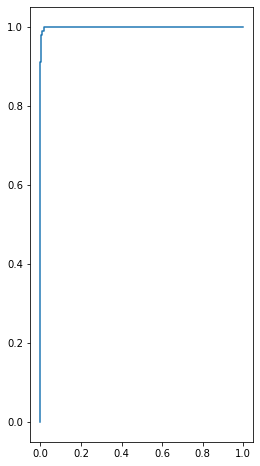

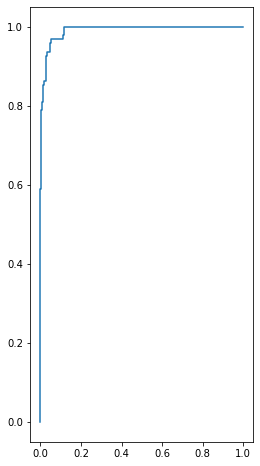

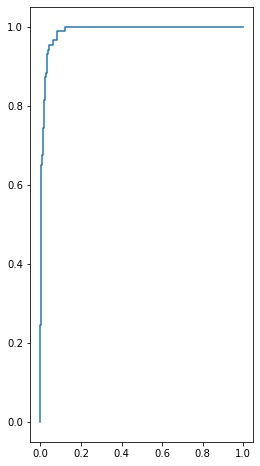

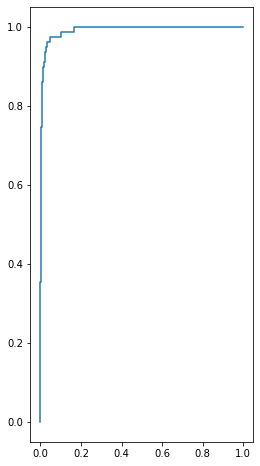

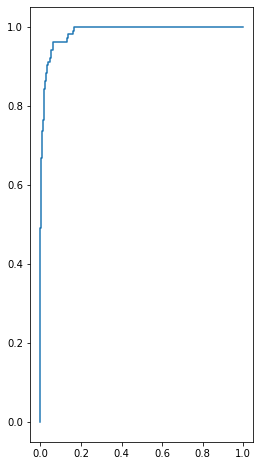

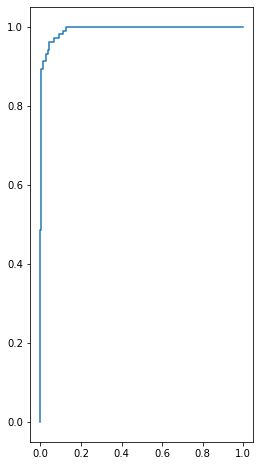

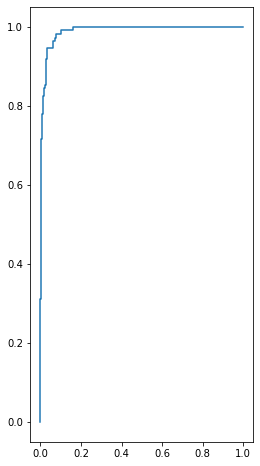

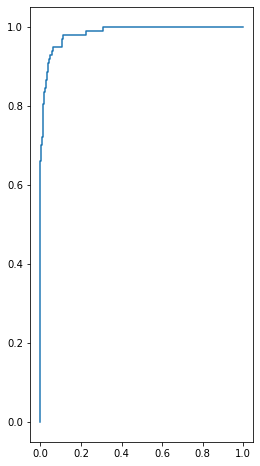

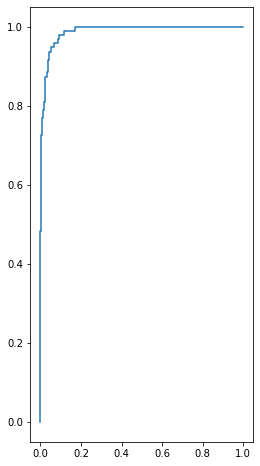

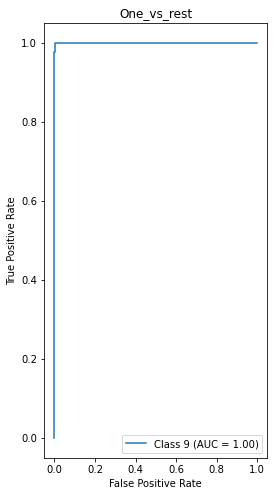

In [219]:
print("\nROC Curve for Dataset with 50 features:")
plotting_roc_curvee(clf_50, new_dataset_50, new_labels_50)


ROC Curve for Dataset with 100 features:


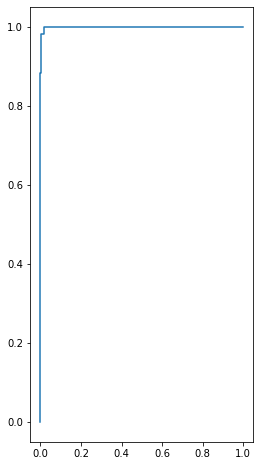

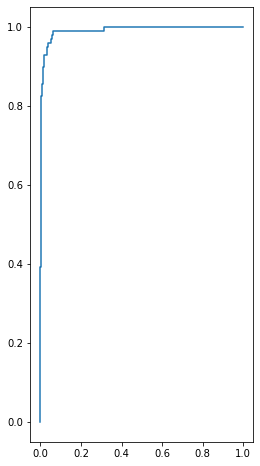

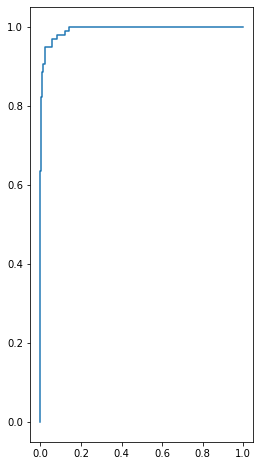

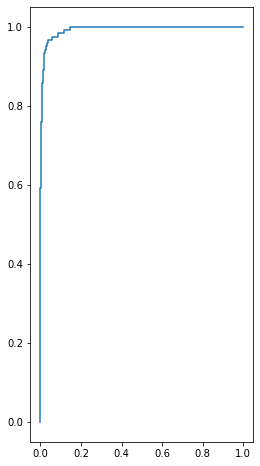

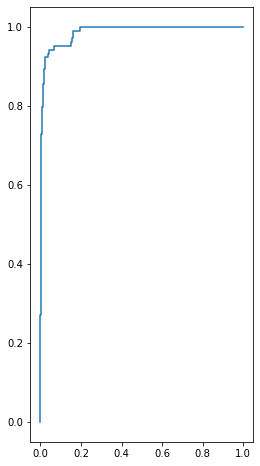

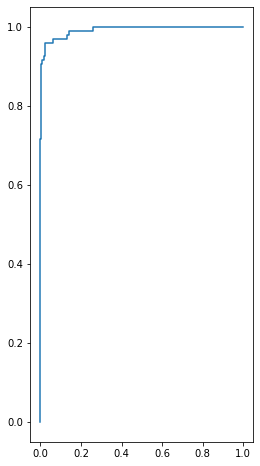

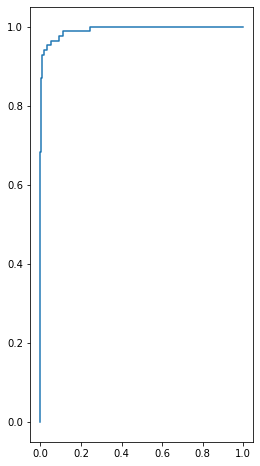

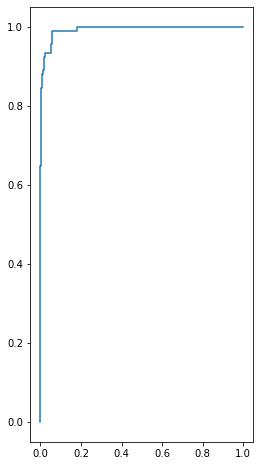

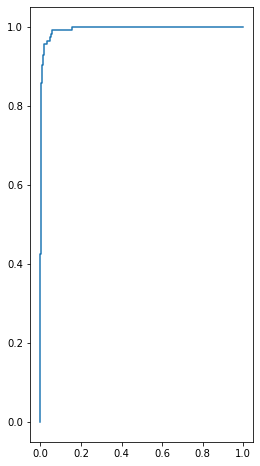

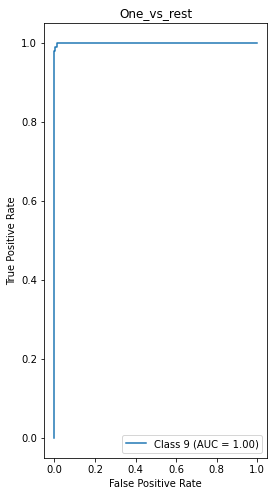

In [176]:
print("\nROC Curve for Dataset with 100 features:")
plotting_roc_curvee(clf_100, new_dataset_100, new_labels_100)



ROC Curve for Dataset with 200 features:


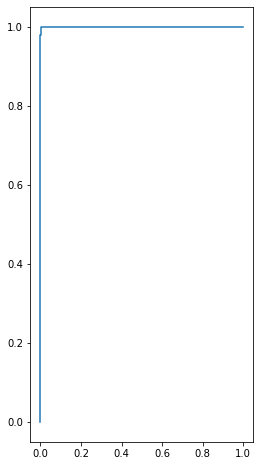

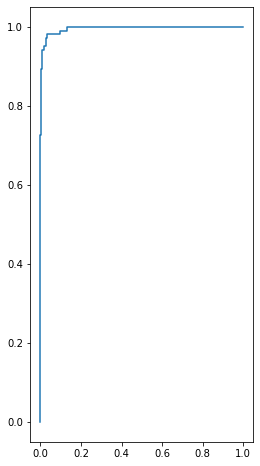

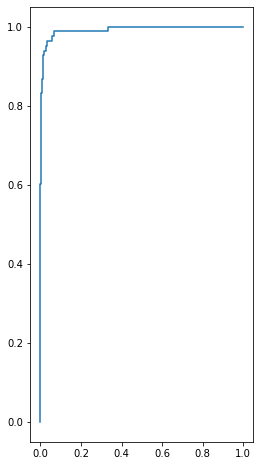

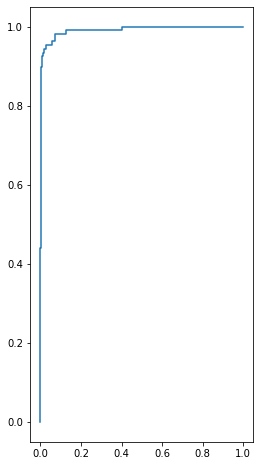

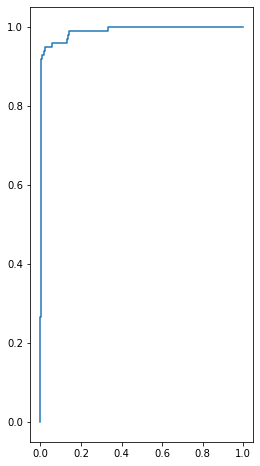

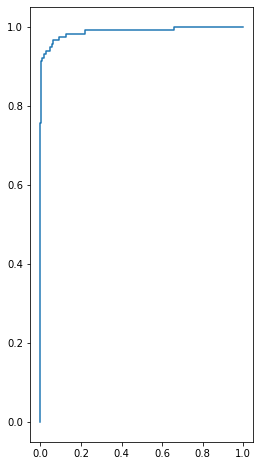

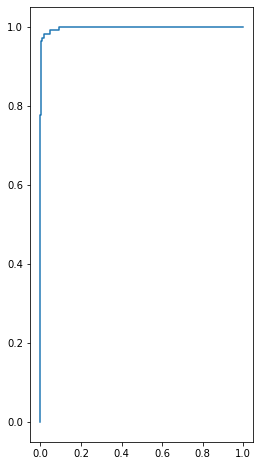

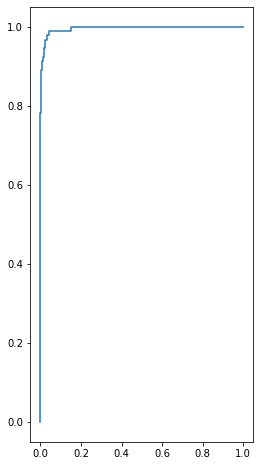

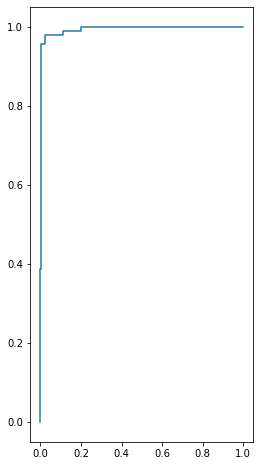

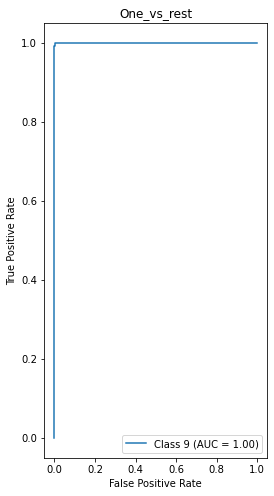

In [177]:
print("\nROC Curve for Dataset with 200 features:")
plotting_roc_curvee(clf_200, new_dataset_200, new_labels_200)